# Метод градиентного спуска

Мы решали задачу линейной регрессии аналитически (МНК), но это не всегда возможно по нескольким причинам:
* Для аналитического решения нужно считать обратную матрицу, это вычислительно сложно и матрица бывает плохо определенной.
* Данных может быть слишком много для того, чтобы их можно было одновременно положить в память для расчета обратной матрицы.
* Модели могут быть слишком сложными для поиска аналитического решения. Для сложных моделей ландшафт функции потерь может иметь рельеф с несколькими локальными минимумами. Например, при использовании более сложных функций потерь или в случае использования моделей, нелинейных по своим параметрам.

Давайте поговорим о том, что делать в таком случае.

## Градиент

Метод, который мы будем использовать, называется **“метод градиентного спуска”**. Для начала вспомним, что такое **градиент**. Возьмем функцию двух переменных:

$$\large f(x, y) = \sin(x\cdot y)$$

Она будет отличаться от функции потерь, которую мы визуализировали, тем, что у нее будет не один экстремум, а сложный рельеф. Рассчитаем ее на диапазоне значений от $0$ до $4$.

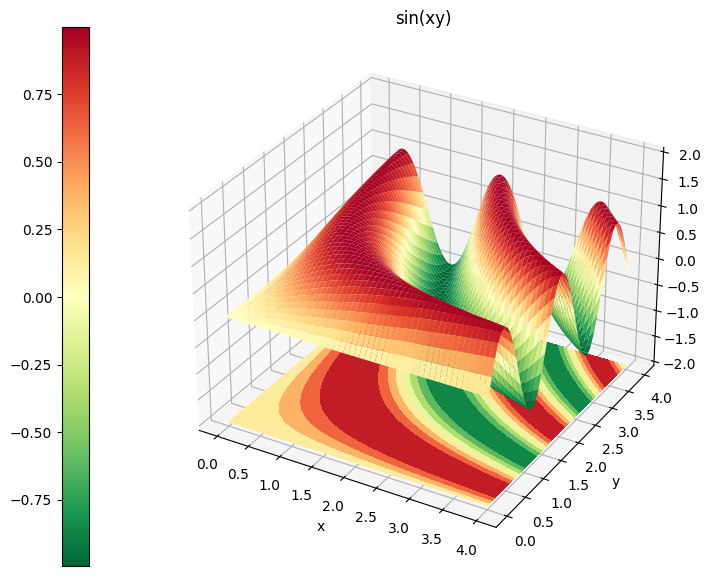

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

fig = plt.figure(figsize=(20, 7))


def show_3d(xx, yy, zz, fig):
    ax = fig.add_subplot(121, projection="3d")
    surf = ax.plot_surface(xx, yy, zz, cmap=plt.cm.RdYlGn_r)

    ax.contourf(xx, yy, zz, zdir="zz", offset=-2, cmap="RdYlGn_r")
    ax.set_zlim(-2, 2)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("sin(xy)")
    fig.colorbar(surf, location="left")


show_3d(xx, yy, zz, fig)
plt.show()

Eсли $\varphi = \varphi(\vec{x})=\varphi(x_1 \dots x_n)$ — функция $n$ переменных, то её градиентом называется $n$-мерный вектор:
$$
\nabla \varphi(\vec{x})=
\begin{bmatrix}
\displaystyle\frac{\partial\varphi}{\partial x_1}\\
\displaystyle\frac{\partial\varphi}{\partial x_2}\\
...\\
\displaystyle\frac{\partial\varphi}{\partial x_n}\\
\end{bmatrix}
$$


Посчитаем градиент нашей функции $f(x, y)$. Для этого воспользуемся [**таблицей производных** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D1%8B%D1%85) и правилом вычисления [**производной сложной функции** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D0%BE%D0%B9_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8) (Chain-rule):
$$\frac {\partial f} {\partial x} = \frac {\partial f} {\partial t} \cdot \frac {\partial t} {\partial x}$$

Это правило очень нам пригодится в будущем при изучении нейронных сетей.

$$\nabla f(x, y)=\begin{bmatrix}
\displaystyle\frac{\partial f}{\partial x}\\
\displaystyle\frac{\partial f}{\partial y}\\
\end{bmatrix}
=\begin{bmatrix}
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial x}\\
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial y}\\
\end{bmatrix}
= \begin{bmatrix}
\cos(xy)\cdot y\\
\cos(xy)\cdot x\\
\end{bmatrix}
$$

Посчитаем градиент на том же диапазоне (сетка реже, т.к. мы будем рисовать не точки, а стрелочки):

In [ ]:
gradf = lambda x, y: (np.cos(x * y) * y, np.cos(x * y) * x)

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

Так как **значение градиента в точке** — это вектор, мы можем говорить о его **величине** и **направлении**. Визуализируем наши расчеты: посмотрим на ландшафт функции $f(x, y)$ и направления градиентов.


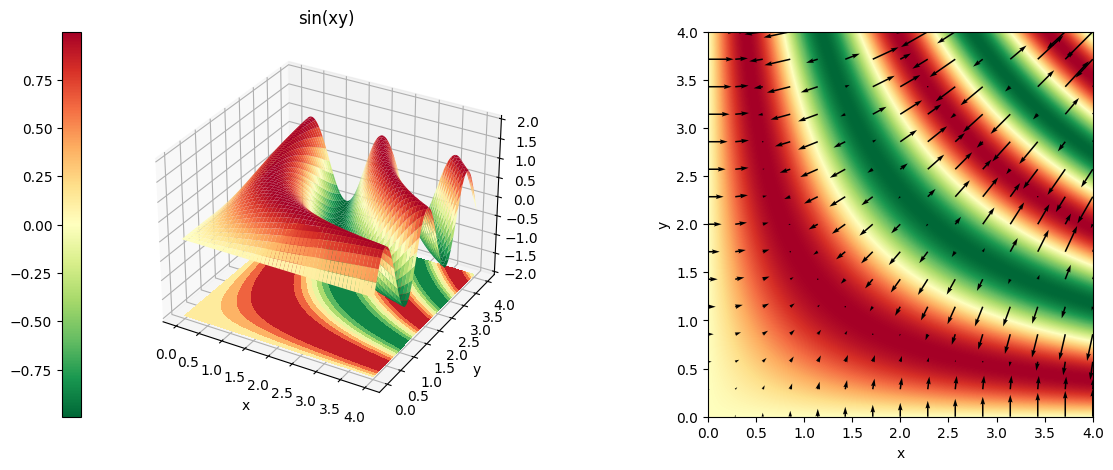

In [ ]:
fig = plt.figure(figsize=(15, 5))
show_3d(xx, yy, zz, fig)

ax = fig.add_subplot(122)
ax.imshow(
    zz,
    extent=(np.min(x), np.max(x), np.min(y), np.max(y)),
    cmap="RdYlGn_r",
    origin="lower",
)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.quiver(xxsmall, yysmall, gradx, grady)
plt.show()

На рисунке выше значения градиента в точке обозначены чёрными стрелочками. Можно заметить, что длина стрелок в  районе максимальных и минимальных значений функции **почти нулевая**, стрелки направлены в направлении возрастания значения функции и наиболее длинные стрелки находятся в области наиболее резкого изменения значений функции.


Это проявление **свойств градиента**:
* Направление $\frac{\nabla f}{||\nabla f||}$ — сообщает нам направление максимального роста функции.

*  Величина $||\nabla f||$ — характеризует мгновенную скорость изменения значений функции.

## Идея градиентного спуска

Загрузим еще раз данные с зависимостью оценок студентов от времени подготовки.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv(
    "https://ml.gan4x4.ru/msu/datasets/student_scores.csv"
)

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Скачаем **код для интерактивной визуализации**. Он нужен только для объяснения и **не пригодится вам в работе**. Его разбирать мы не будем. Eсли интересно, можно изучить самостоятельно.

In [ ]:
# @title *Code for interactive visual
# source: https://github.com/TomasBeuzen/deep-learning-with-pytorch

!wget -qN https://ml.gan4x4.ru/msu/dev-2.1/L02/interactive_visualization.py

Для простоты рассмотрим одномерный случай. Будем подбирать только $w$, значение $b$ зафиксируем на уровне $2.83$. Визуализируем ошибку и значения $\dfrac{\partial \text{Loss}}{\partial w}$ для MSE Loss.

In [ ]:
from interactive_visualization import plot_grid_search
from sklearn.metrics import mean_squared_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mse = np.array([mean_squared_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmse_dw = np.array(
    [(2 * x_train[:, 0] * (w * x_train[:, 0] + 2.83 - y_train)).mean() for w in slopes]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mse, dmse_dw)

 Видно, что оптимальное значение наклона соответствует минимуму MSE и нулю частной производной $\dfrac{\partial \text{Loss}}{\partial w}$. Аналогично будет, если мы возьмем в качестве Loss MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mae = np.array([mean_absolute_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmae_dw = np.array(
    [
        (x_train[:, 0] * np.sign(w * x_train[:, 0] + 2.83 - y_train)).mean()
        for w in slopes
    ]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mae, dmae_dw)

Итого, т.к. градиент указывает направление наибольшего возрастания функции:

* если $\dfrac{\partial \text{Loss}}{\partial w} < 0$, то нам имеет смысл “идти” в сторону возрастания $\dfrac{\partial \text{Loss}}{\partial w}$;

* если $\dfrac{\partial \text{Loss}}{\partial w} > 0$ — в сторону убывания.

**Метод градиентного спуска** — итеративный метод, идея которого заключается в том, чтобы небольшими шажками “идти” в **обратную от градиента сторону**:

$$\large \vec w_{n+1} = \vec w_{n} - α \cdot \nabla_{\vec w_{n}} \text{Loss},$$
где $α$ — скорость обучения.


Попробуем реализовать это в коде (для простоты только для $w$ при $b=2.83$).

Обратите внимание:
- предсказание считается `w * x_test + b`
- градиент считается `2 * (x * (w * x + b - y)).mean()`

Через пепемножение скалярных величин.

In [ ]:
def gradient(x, y, w, b):
    return 2 * (x * (w * x + b - y)).mean()


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, b=2.83, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = [w]
    mse_train = [mean_squared_error(y_train, w * x_train + b)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, w * x_test + b)]
    prediction = {w: w * x_train + b}
    print(
        f"Iteration 0: w = {w:.2f}, Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )
    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w, b)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws.append(w)
        mse_train.append(mean_squared_error(y_train, w * x_train + b))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, w * x_test + b))
        prediction[w] = w * x_train + b
        print(
            f"Iteration {i+1}: w = {w:.2f}, Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Обучим нашу модель:

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.01, iteration=7
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 7.89, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 9.00, Loss_train = 130.56, Loss_test = 145.80.
Iteration 3: w = 9.42, Loss_train = 45.98, Loss_test = 42.65.
Iteration 4: w = 9.58, Loss_train = 33.58, Loss_test = 24.38.
Iteration 5: w = 9.64, Loss_train = 31.77, Loss_test = 20.49.
Iteration 6: w = 9.67, Loss_train = 31.50, Loss_test = 19.46.
Iteration 7: w = 9.68, Loss_train = 31.46, Loss_test = 19.13.


Визуализируем процесс обучения:

In [ ]:
from interactive_visualization import plot_gradient_descent

plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Видно, что за 7 эпох мы получили то же значение $w$, что получали при использовании `LinearRegression`. При этом мы пришли в минимум MSE и ноль градиента.

"Эпохой" обучения мы будем называть последовательность шагов оптимизации, при которой мы использовали информацию обо всех данных из тренировочной выборки. В нашем примере мы использовали всю обучающую выборку на каждом шаге градиентного спуска, потому "шаги градиентного спуска" и "эпохи" в данном примере синонимичны.


В реальности мы будем работать с функциями многих переменных, поэтому смотреть на сходимость по одной переменной — не самый оптимальный вариант. Более эффективно будет посмотреть на зависимость Loss от количества эпох для train и test.

In [ ]:
def plot_mse(mse_train, mse_test):
    plt.figure(figsize=(10, 4))
    plt.title("Learning curve")
    plt.plot(mse_train, label="train")
    plt.plot(mse_test, label="test")
    plt.legend()

    plt.xlabel("iterations", fontsize=12)
    plt.ylabel("MSE Loss", fontsize=12)

    plt.grid(True)
    plt.show()

Такие графики называют кривыми обучения. Посмотрим на кривые обучения при нашей скорости обучения $α=0.01$.

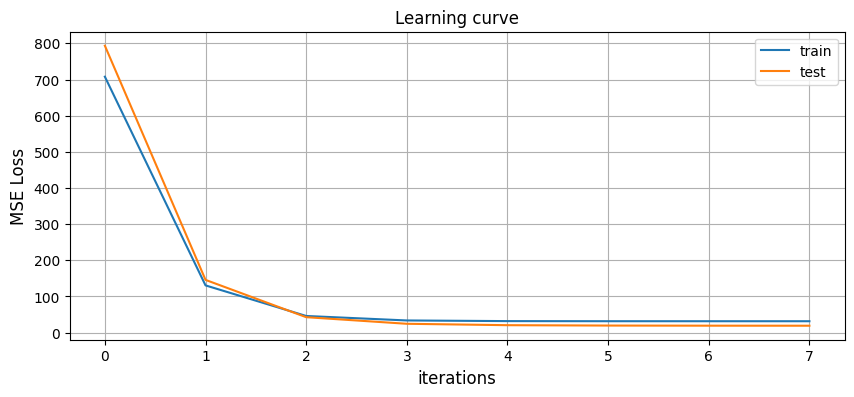

In [ ]:
plot_mse(mse_train, mse_test)

Видно, что **Loss падает** как на **train**, так и на **test** выборке. Также мы можем сказать, что **сеть обучилась**: train и test **графики вышли на плато**. При этом не произошло **переобучение**: ошибка на **test** выборке **не начала расти**.

В полученных графиках есть особенность, которая бросается в глаза опытному в обучении моделей человеку: **Loss на test выборке меньше, чем на train**. Это показатель того, что **с данными что-то не так**. Так бывает при утечке данных, но в данном случае, test выборка просто слишком мала, чтобы отражать генеральную совокупность (всего 5 студентов).

## Выбор скорости обучения

**Скорость (шаг) обучения** — некоторый коэффициент, как правило, небольшой, который позволяет нам управлять размером шага. У нас есть локальный минимум, в который мы хотим попасть. Если мы сделаем слишком большой шаг, то мы его перескочим (график справа). Нужно подобрать шаг, который не позволит перескочить минимум, но в то же время такой, чтобы тот же процесс не шел слишком медленно (как на графике слева).

<img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/out/learning_rate_optimal_value.png">

Посмотрим на скорость обучения на нашем примере. При **маленькой скорости обучения** мы будем очень медленно сходиться к минимуму.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.0005, iteration=30
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 5.14, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 5.28, Loss_train = 666.74, Loss_test = 748.16.
Iteration 3: w = 5.42, Loss_train = 628.13, Loss_test = 705.49.
Iteration 4: w = 5.55, Loss_train = 591.87, Loss_test = 665.36.
Iteration 5: w = 5.68, Loss_train = 557.82, Loss_test = 627.61.
Iteration 6: w = 5.80, Loss_train = 525.83, Loss_test = 592.12.
Iteration 7: w = 5.92, Loss_train = 495.79, Loss_test = 558.73.
Iteration 8: w = 6.04, Loss_train = 467.57, Loss_test = 527.33.
Iteration 9: w = 6.15, Loss_train = 441.07, Loss_test = 497.79.
Iteration 10: w = 6.26, Loss_train = 416.17, Loss_test = 470.01.
Iteration 11: w = 6.37, Loss_train = 392.79, Loss_test = 443.88.
Iteration 12: w = 6.47, Loss_train = 370.84, Loss_test = 419.29.
Iteration 13: w = 6.57, Loss_train = 350.21, Loss_test = 396.16.
Iteration 14: w = 6.66, Loss_train = 330.84, Loss_test = 374.40.
Iteration 15: w = 6.76, Loss_train 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Спустя 30 итераций оранжевая прямая плохо отражает генеральную совокупность. Мы не достигли минимума MSE и нуля градиента.

Посмотрим, как выглядят кривые обучения:

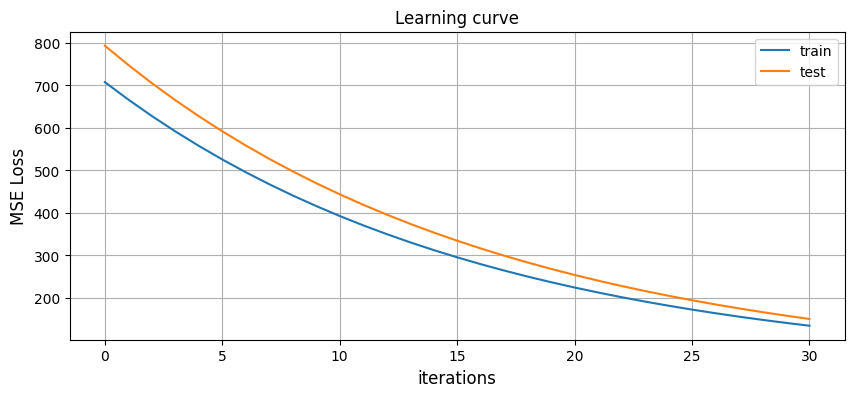

In [ ]:
plot_mse(mse_train, mse_test)

Модель недообучена — значения Loss не вышли на плато.

Посмотрим на **достаточно большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.027, iteration=15
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 12.80, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 7.60, Loss_train = 331.92, Loss_test = 300.22.
Iteration 3: w = 11.07, Loss_train = 164.92, Loss_test = 185.76.
Iteration 4: w = 8.76, Loss_train = 90.74, Loss_test = 65.14.
Iteration 5: w = 10.30, Loss_train = 57.79, Loss_test = 58.06.
Iteration 6: w = 9.27, Loss_train = 43.15, Loss_test = 23.93.
Iteration 7: w = 9.96, Loss_train = 36.65, Loss_test = 29.42.
Iteration 8: w = 9.50, Loss_train = 33.76, Loss_test = 18.09.
Iteration 9: w = 9.80, Loss_train = 32.48, Loss_test = 22.24.
Iteration 10: w = 9.60, Loss_train = 31.91, Loss_test = 17.96.
Iteration 11: w = 9.74, Loss_train = 31.66, Loss_test = 20.14.
Iteration 12: w = 9.65, Loss_train = 31.54, Loss_test = 18.39.
Iteration 13: w = 9.71, Loss_train = 31.49, Loss_test = 19.42.
Iteration 14: w = 9.67, Loss_train = 31.47, Loss_test = 18.67.
Iteration 15: w = 9.69, Loss_train = 31.46, Loss_test 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Шаг, получаемый умножением градиента на скорость обучения, получается достаточно большим, чтобы “перескочить” локальный минимум, но при этом модель все-таки попадает в него. Кривые обучения при этом успешно выходят на плато.

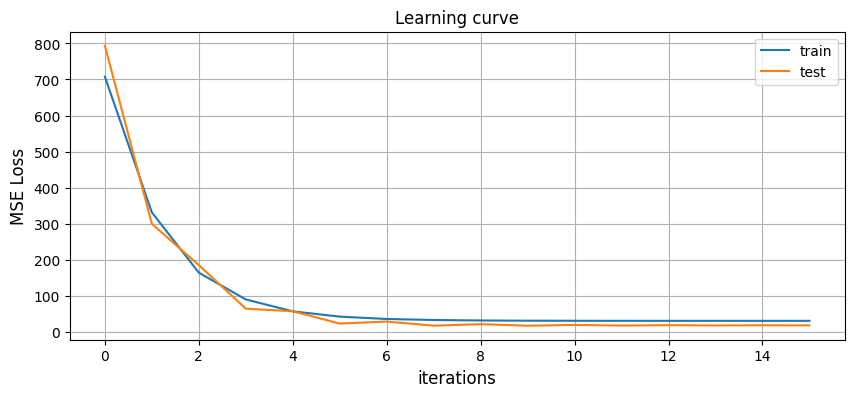

In [ ]:
plot_mse(mse_train, mse_test)

В финале посмотрим на **очень большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0],
    y_train,
    x_test[:, 0],
    y_test,
    w=5,
    alpha=0.034,
    iteration=5,
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 14.82, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 4.03, Loss_train = 847.72, Loss_test = 823.37.
Iteration 3: w = 15.89, Loss_train = 1016.53, Loss_test = 1132.95.
Iteration 4: w = 2.86, Loss_train = 1220.26, Loss_test = 1206.01.
Iteration 5: w = 17.17, Loss_train = 1466.11, Loss_test = 1624.33.


Шаг, который мы делаем, слишком большой. Мы не попадаем в локальный минимум.

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)


По кривым обучения видно, что модель не сошлась: ошибка растет.


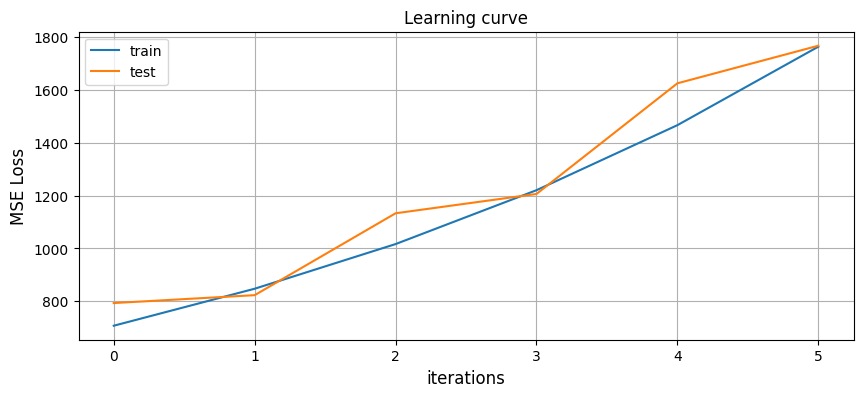

In [ ]:
plot_mse(mse_train, mse_test)

Выбор скорости обучения будет зависеть от модели и данных. В блоке про нейронные сети вы познакомитесь с различными модификациями метода градиентного спуска и узнаете больше о выборе скорости обучения, а пока ориентируйтесь на кривые обучения.

## Единый подход к учету смещения

Пока мы настраивали только одну переменную, но даже в случае предсказания оценки по времени подготовки у нас две переменные: вес $w$ и смещение $b$.

Когда признаков станет больше, у нас получится “лапша” из слагаемых:
$$y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n$$

Нам бы хотелось записать их компактно, чтобы не усложнять код и использовать один и тот же код для данных с разным количеством признаков.  Для этого мы будем использовать матричное перемножение и трюк **“столбец единиц”**, который реализует **единый подход к учету смещения**.

Обозначим вектор-столбец из настраиваемых параметров:
$$\vec w = \begin{bmatrix}
b \\ w \\
\end{bmatrix}$$


In [ ]:
w = np.array([[0.5], [5]])
w

array([[0.5],
       [5. ]])

К матрице (в нашем случае был только один признак, поэтому у нас будет вектор-столбец) признаков слева "дорисуем" столбец единиц:
$$X = \begin{bmatrix}
1 & X \\
\end{bmatrix} =
\begin{bmatrix}
1 & 2.7 \\
1 & 3.3 \\
... & ...\\
1 & 9.2 \\
\end{bmatrix}$$

**Предупреждение:** добавлять столбец единиц нужно, только если вы сами пишете модель. **Если вы пользуетесь готовыми моделями, в этом нет необходимости.**


In [ ]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
x_test

array([[1. , 8.3],
       [1. , 2.5],
       [1. , 2.5],
       [1. , 6.9],
       [1. , 5.9]])

Матрицу $X$ можно матрично перемножить со столбцом $\vec w$, т.к количество столбцов $X$ совпадает с количеством строк в $\vec w$:

In [ ]:
x_train.shape, w.shape

((20, 2), (2, 1))

В общем случае:

$$\large \vec y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n = X\vec w $$  

Эту формулу можно свести к нескольким символам кода (`@` — матричное умножение):


In [ ]:
y_pred = x_test @ w
y_pred

array([[42.],
       [13.],
       [13.],
       [35.],
       [30.]])

## Необходимость нормализации

Реализуем многомерный градиентный спуск

In [ ]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

Обратите внимание:
- предсказание считается `x_train @ w`
- градиент считается `2 * (x.T @ (x @ w) - x.T @ y) / len(x)`

Через перемножение матриц!

In [ ]:
def gradient(x, y, w):
    """Gradient of mean squared error."""
    return 2 * (x.T @ (x @ w) - x.T @ y) / len(x)


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w

        print(
            f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
            f"Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Попробуем обучить модель:

In [ ]:
w = np.array([[0.5], [5]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    0.01,
)

Iteration 0: b = 0.50, w = 5.00, Loss_train = 821.48, Loss_test = 915.80.
Iteration 1: b = 1.01, w = 8.12, Loss_train = 821.48, Loss_test = 915.80.
Iteration 2: b = 1.20, w = 9.26, Loss_train = 138.11, Loss_test = 152.87.
Iteration 3: b = 1.28, w = 9.68, Loss_train = 46.20, Loss_test = 41.48.
Iteration 4: b = 1.31, w = 9.84, Loss_train = 33.84, Loss_test = 23.27.
Iteration 5: b = 1.32, w = 9.89, Loss_train = 32.17, Loss_test = 19.64.
Iteration 6: b = 1.33, w = 9.91, Loss_train = 31.95, Loss_test = 18.72.
Iteration 7: b = 1.34, w = 9.92, Loss_train = 31.91, Loss_test = 18.44.
Iteration 8: b = 1.34, w = 9.92, Loss_train = 31.90, Loss_test = 18.35.
Iteration 9: b = 1.35, w = 9.92, Loss_train = 31.90, Loss_test = 18.31.
Iteration 10: b = 1.36, w = 9.92, Loss_train = 31.90, Loss_test = 18.30.


Мы не дошли до оптимальной прямой $y = 9.68x+2.83$, которую вычисляли выше.

При этом график Loss выглядит неплохо:

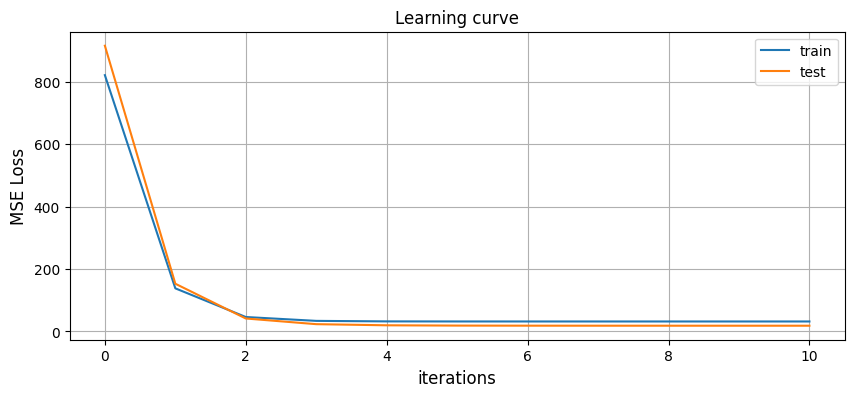

In [ ]:
plot_mse(mse_train, mse_test)

Такое поведение связано с ландшафтом функции потерь: значение ошибки по оси $b$ изменяется намного медленнее, чем по оси $w$.

In [ ]:
from interactive_visualization import plot_grid_search_2d

intercepts = np.arange(-7.5, 12.5, 0.1)  # b
slopes = np.arange(5, 15, 0.1)  # w
plot_grid_search_2d(x_train[:, 1], y_train, slopes, intercepts)

Поэтому основное изменение значений происходит вдоль оси $w$, а $b$ меняется слабо (значение $b$ далеко от ожидаемого).

In [ ]:
from interactive_visualization import plot_gradient_descent_2d

plot_gradient_descent_2d(
    x_train[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

Чтобы исправить ситуацию, применим `StandardScaler`:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(np.expand_dims(x_train[:, 1], axis=1)).flatten()
x_test_scaled = scaler.transform(np.expand_dims(x_test[:, 1], axis=1)).flatten()

In [ ]:
intercepts = np.arange(40, 60, 0.1)  # b
slopes = np.arange(15, 35, 0.1)  # w

plot_grid_search_2d(x_train_scaled, y_train, slopes, intercepts)

In [ ]:
x_train_scaled = np.hstack(
    (np.ones((len(x_train_scaled), 1)), np.expand_dims(x_train_scaled, axis=1)),
)

x_test_scaled = np.hstack(
    (np.ones((len(x_test_scaled), 1)), np.expand_dims(x_test_scaled, axis=1)),
)

Т.к. диапазоны $x$ изменились, значения $w$ и $b$ тоже изменятся.


In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train_scaled, y_train, x_test_scaled, y_test, w, 0.35, iteration=10
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 1: b = 52.70, w = 26.86, Loss_train = 146.31, Loss_test = 108.53.
Iteration 2: b = 51.40, w = 25.01, Loss_train = 41.79, Loss_test = 21.10.
Iteration 3: b = 51.02, w = 24.46, Loss_train = 32.39, Loss_test = 17.36.
Iteration 4: b = 50.90, w = 24.29, Loss_train = 31.54, Loss_test = 18.27.
Iteration 5: b = 50.86, w = 24.24, Loss_train = 31.46, Loss_test = 18.72.
Iteration 6: b = 50.85, w = 24.23, Loss_train = 31.46, Loss_test = 18.88.
Iteration 7: b = 50.85, w = 24.23, Loss_train = 31.45, Loss_test = 18.92.
Iteration 8: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 9: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 10: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.


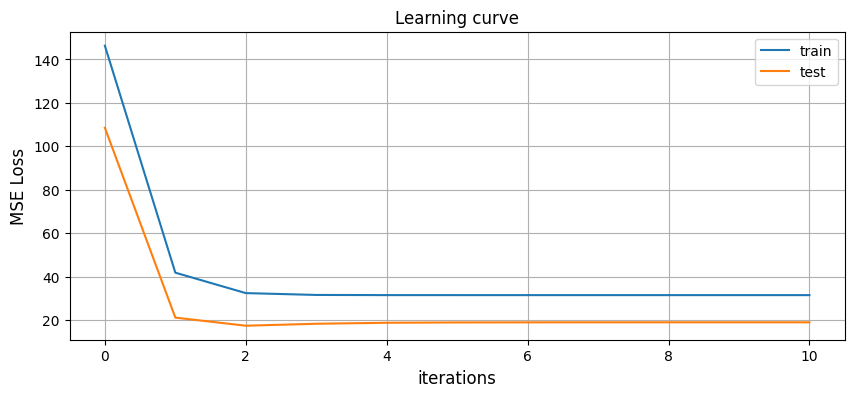

In [ ]:
plot_mse(mse_train, mse_test)

Проверим, что после нормализации мы сходимся к $y = 9.68x + 2.83$.  Для этого используем данные о матожидании и дисперсии из `StandardScaler`.

In [ ]:
b = ws[-1][0] - ws[-1][1] * scaler.mean_ / (scaler.var_) ** 0.5
w = ws[-1][1] / (scaler.var_) ** 0.5

print(f"y = {w[0]:.2f}x + {b[0]:.2f}")

y = 9.68x + 2.83


По визуализации видно, что $w$ и $b$ изменяются во время обучения.

In [ ]:
plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

## Cтохастический градиентный спуск

[[blog] ✏️ Пост о стохастическом градиентом спуске](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html)

До этого мы обучали модель, рассчитывая градиент по **всей train выборке**. То есть один шаг градиентного спуска мог быть "долгим" и **вычислительно сложным** из-за необходимости определения градиента функции потерь на всех потенциально многочисленных train объектах. Можем ли мы совершать шаги градиентного спуска "чаще" и существенно ускорить сходимость модели к верному ответу?


Поэтому появляется идея **стохастического градиентного спуска**: мы можем делать шаг обучения, рассчитывая градиент не по всей выборке (**batch**), а по нескольким случайно выбранным объектам (**mini-batch**) или даже по одному случайно выбранному объекту (**stochastic**).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/out/define_size_of_batch.png" width="500"></center>

Можно [показать 📚[book]](https://academy.yandex.ru/handbook/ml/article/shodimost-sgd), что **стохастический градиентный спуск сходится к минимуму** (глобальному или локальному) функции потерь, как и "обычный" градиентный спуск, при меньшем объеме вычислений.
Важным условием является случайный выбор объектов. Если мы будем использовать одну и ту же последовательность выборок, это приведет к накоплению ошибки и смещению результата.

Добавим создание подвыборки к нашему алгоритму:

In [ ]:
def stochastic_gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    alpha,
    iteration=10,
    batch_size=None,
):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        if not batch_size:
            x_sample = x_train
            y_sample = y_train
        else:
            indxs = np.random.choice(x_train.shape[0], batch_size)
            x_sample = x_train[indxs, :]
            y_sample = y_train[indxs, :]

        # adjust w based on gradient * learning rate
        grad = gradient(x_sample, y_sample, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w
        if (i + 1) % 10 == 0:
            print(
                f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
                f"Loss_train = {mse_train[i]:.2f}, "
                f"Loss_test = {mse_test[i]:3.2f}."
            )
    return ws, prediction, mse_train, dmse_train, mse_test

Чтобы сравнить результаты, будем использовать одни и те же количество итераций и скорость обучения. Чтобы компенсировать стохастичность, возьмем маленькое значение $\alpha$ и $100$ итераций.

Для всего train сета мы посчитаем градиент для $20\cdot100 = 2000$ точек.

In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=None,
)

f1 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
    mode="lines",
    title="Batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.94, w = 30.06, Loss_train = 86.54, Loss_test = 55.92.
Iteration 20: b = 53.57, w = 28.10, Loss_train = 55.80, Loss_test = 30.94.
Iteration 30: b = 52.66, w = 26.80, Loss_train = 42.22, Loss_test = 21.36.
Iteration 40: b = 52.05, w = 25.94, Loss_train = 36.21, Loss_test = 18.09.
Iteration 50: b = 51.65, w = 25.36, Loss_train = 33.56, Loss_test = 17.29.
Iteration 60: b = 51.38, w = 24.98, Loss_train = 32.38, Loss_test = 17.36.
Iteration 70: b = 51.20, w = 24.73, Loss_train = 31.87, Loss_test = 17.68.
Iteration 80: b = 51.08, w = 24.56, Loss_train = 31.64, Loss_test = 18.01.
Iteration 90: b = 51.01, w = 24.45, Loss_train = 31.54, Loss_test = 18.28.
Iteration 100: b = 50.95, w = 24.37, Loss_train = 31.49, Loss_test = 18.49.


Для стохастического градиентного спуска (размер $\text{batch}=1$) мы посчитаем градиент для $1\cdot100 = 100$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
ws_stohastic, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=1,
)
f2 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_stohastic,
    slopes,
    intercepts,
    mode="lines",
    title="Stochastic gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.17, w = 29.83, Loss_train = 74.29, Loss_test = 45.31.
Iteration 20: b = 54.43, w = 28.49, Loss_train = 62.91, Loss_test = 37.09.
Iteration 30: b = 52.67, w = 26.34, Loss_train = 42.71, Loss_test = 22.04.
Iteration 40: b = 51.48, w = 23.96, Loss_train = 32.13, Loss_test = 18.45.
Iteration 50: b = 52.13, w = 25.01, Loss_train = 33.79, Loss_test = 17.58.
Iteration 60: b = 51.83, w = 25.15, Loss_train = 33.67, Loss_test = 17.93.
Iteration 70: b = 52.79, w = 25.67, Loss_train = 37.54, Loss_test = 19.11.
Iteration 80: b = 51.72, w = 24.74, Loss_train = 32.47, Loss_test = 17.52.
Iteration 90: b = 51.25, w = 25.29, Loss_train = 32.72, Loss_test = 17.30.
Iteration 100: b = 50.82, w = 24.18, Loss_train = 31.49, Loss_test = 18.89.


Для стохастического спуска с $\text{mini-batch}=5$ мы посчитаем градиент для $5\cdot100=500$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
(
    ws_mini_batch,
    prediction,
    mse_train,
    dmse_train,
    mse_test,
) = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=5,
)
f3 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_mini_batch,
    slopes,
    intercepts,
    mode="lines",
    title="Mini-batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.89, w = 29.67, Loss_train = 79.49, Loss_test = 50.29.
Iteration 20: b = 53.54, w = 27.93, Loss_train = 52.77, Loss_test = 28.57.
Iteration 30: b = 52.28, w = 26.91, Loss_train = 42.28, Loss_test = 21.22.
Iteration 40: b = 51.72, w = 25.83, Loss_train = 35.69, Loss_test = 17.80.
Iteration 50: b = 51.10, w = 24.92, Loss_train = 32.10, Loss_test = 17.53.
Iteration 60: b = 50.84, w = 24.91, Loss_train = 32.06, Loss_test = 17.59.
Iteration 70: b = 51.04, w = 24.98, Loss_train = 32.12, Loss_test = 17.46.
Iteration 80: b = 51.28, w = 24.72, Loss_train = 31.93, Loss_test = 17.63.
Iteration 90: b = 51.03, w = 24.41, Loss_train = 31.56, Loss_test = 18.33.
Iteration 100: b = 50.85, w = 23.98, Loss_train = 31.48, Loss_test = 19.36.


Мы ищем минимум для всех данных.
- Градиент, рассчитанный по одному объекту, будет специфичен. Трек обучения  в случае стохастического градиентного спуска будет запутанным, а итоговая ошибка будет расти с увеличением скорости обучения (мы взяли низкую скорость).
- Градиент, рассчитанный по нескольким объектам будет давать лучшую оценку градиента для всех данных. Трек будет менее сложным.
- Градиент, рассчитанный по всей выборке, будет давать наиболее точное направление (при отсутствии "шума" в обучающих данных).

In [ ]:
from interactive_visualization import plot_panel

plot_panel(f1, f2, f3)

Для **ускорения расчетов** рекомендовано использовать **максимальный размер mini-batch**, который помещается в память, но это не всегда дает лучший результат. В блоке про нейронные сети вы увидите, что для сложных моделей стохастичность, связанная с небольшим размером батча, может помочь выбраться из локального минимума и найти более глубокий.
